# Big Data Wrangling With Google Books Ngrams

## Table of Contents
- [Big Data Wrangling With Google Books Ngrams](#big-data-wrangling-with-google-books-ngrams)
  - [Introduction](#introduction)
  - [Load the dataset](#load-the-dataset)
  - [Create the visualization](#create-the-visualization)
  - [Findings](#findings)


## Introduction

The following steps for the deliverable have already been done.

For questions 1-5:
- we created a EMR Spark cluster on AWS
- loaded the Google Ngrams dataset from the brainstation-dsft S3 bucket
- filtered the dataset to include only the rows where the token was `data`
- saved the resulting dataset and downloaded it onto our local machine.
- The resulting file is called `ngramLocal.csv`

This notebook addresses questions 6 and 7 of the deliverable. We will load the downloaded dataset and create a visualization to see the frequency of the word `data` over the years.

## Load the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("ngramLocal.csv",header=1)
df.shape

(316, 5)

In [3]:
df.head()

,token,year,frequency,pages,books
0,data,1584,16,14,1
1,data,1614,3,2,1
2,data,1627,1,1,1
3,data,1631,22,18,1
4,data,1637,1,1,1


In [12]:
df.isna().sum().sum()

0

In [13]:
df.duplicated().sum()

0

## Create the visualization

Plot the number of occurences of the token (the *frequency* column) of `data` over the years using matplotlib

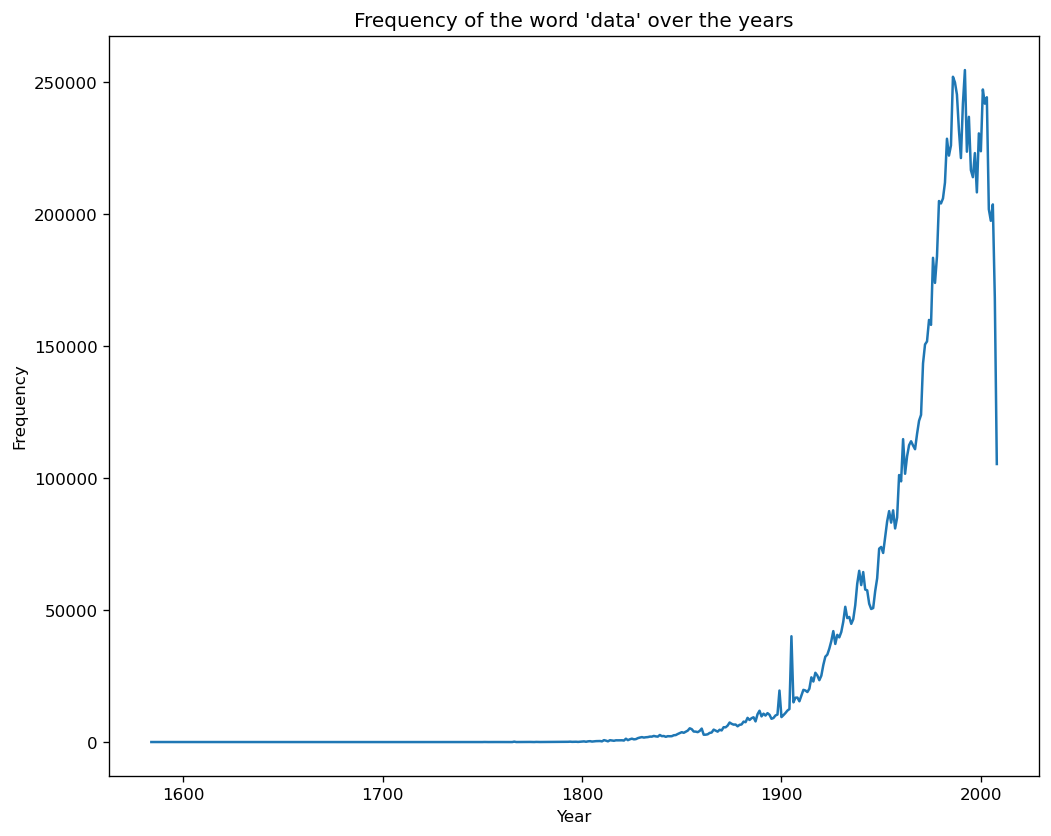

In [4]:
plt.figure(figsize=(10,8), dpi=120)
plt.plot(df['year'], df['frequency'])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of the word \'data\' over the years')
plt.show()

We can see a large part of the visual rfom 1600 to 1800 is showing negligible mentions of `data` as compared to the years after. We will change the x axis to start from 1800, and also use plotly to build an interactive chart.

In [6]:
import plotly.express as px

In [11]:
fig = px.line(df, x="year", y="frequency", title="Frequency of the word 'data' over the years")
fig.update_xaxes(range=[1880, 2010])
fig.show()

## Findings

- Documents from the year 1992 had the highest frequency of the word `data` in them.